# Intro to Market Basket Analysis

This project uses a Kaggle-published open-source dataset for Market Basket Analysis, a technique that identifies patterns in frequently purchased items to inform business decisions. We'll analyze the dataset using the apriori algorithm to study how seasonality affects customer grocery habits, starting with data cleaning.

The original data can be found at: 
https://www.kaggle.com/code/heeraldedhia/market-basket-analysis-using-apriori-algorithm/input


## Part 1: Exploring the Data

The first part of the project is to explore the data, in order to obtain, 4 preprocess sets divided by seasonality on which it will be possible to use the Transaction Encoder.
We must first create the Time Frame, we will study, we will first get it by season. We will infer whether, there are difference in results given the 4 different periods that we consider.
We can then compare the application of the apriori algorithm on all seasons.

In [1]:
!pip install mlxtend
import numpy as np # we must import our packages for data pre-processing
import pandas as pd # we bring pandas which will be used extensively
from mlxtend.preprocessing import TransactionEncoder # we use the packages for the apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules # we bring in the association rule
import matplotlib.pyplot as plt
import seaborn as sns

seasons = 4 #Global variable

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Questions to answer:
- What does TransactionEncoder do? 
- How does TransactionEconder work?
- What is the apriori Algorithm?
- What are association Rules?

In [2]:
#data_basket = pd.read_csv("basket.csv") # bring the data
data = pd.read_csv("GroceriesData.csv") # we add our data into a frame work
data = pd.DataFrame(data) # bring the data in a dataFrame

In [3]:
def seasonEncoding():
    seasons = [month%12 // 3 + 1 for month in range(1, 13)] # we get the number seasonality
    # by number first
    seasonResult = []
    for season in seasons:
        if season ==1:
            seasonResult.append("Winter") # we then append the season to a list matching the
            # index
        elif season ==2:
            seasonResult.append("Spring")
        elif season ==3:
            seasonResult.append("Summer")
        else:
            seasonResult.append("Fall")
    month_to_season = dict(zip(range(1,13), seasonResult)) # we get the dictionary from the
    # month number to the season
    return month_to_season
    

In [4]:
month_to_season = seasonEncoding()
month_to_season # we see the dictionary encoding the Season
#We consider the seasons by month instead of precise date

{1: 'Winter',
 2: 'Winter',
 3: 'Spring',
 4: 'Spring',
 5: 'Spring',
 6: 'Summer',
 7: 'Summer',
 8: 'Summer',
 9: 'Fall',
 10: 'Fall',
 11: 'Fall',
 12: 'Winter'}

In [5]:
data.head() # this is the "raw" data

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [6]:
print(data['month'][0]) # the 7th month is July
month_to_season.get(data['month'][0]) #July is a summer month

7


'Summer'

In [7]:
data['season'] = data['month'].apply(lambda month: month_to_season.get(month))
# WE add here the season to our Data frame, so we can then separate the transaction

In [8]:
data.head() # the season is present

,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
1,2552,2015-05-01,whole milk,2015,5,1,4,Spring
2,2300,2015-09-19,pip fruit,2015,9,19,5,Fall
3,1187,2015-12-12,other vegetables,2015,12,12,5,Winter
4,3037,2015-01-02,whole milk,2015,1,2,4,Winter


In [9]:
g = data.groupby(by='season') # we group by season 

In [10]:
data_basket = data.drop(columns=['year','month','day'],axis=1)

In [11]:
data_basket.head() # this is what we want for 4 different dataframe one for each season 

,Member_number,Date,itemDescription,day_of_week,season
0,1808,2015-07-21,tropical fruit,1,Summer
1,2552,2015-05-01,whole milk,4,Spring
2,2300,2015-09-19,pip fruit,5,Fall
3,1187,2015-12-12,other vegetables,5,Winter
4,3037,2015-01-02,whole milk,4,Winter


In [12]:
data_basket.fillna('!',inplace=True) # we must preprocess the data like that for the basket to be able to use mlxtend
trans = data_basket.values.tolist() 
data_basket.head() # this is what our data must look like after being transformed

,Member_number,Date,itemDescription,day_of_week,season
0,1808,2015-07-21,tropical fruit,1,Summer
1,2552,2015-05-01,whole milk,4,Spring
2,2300,2015-09-19,pip fruit,5,Fall
3,1187,2015-12-12,other vegetables,5,Winter
4,3037,2015-01-02,whole milk,4,Winter


In [13]:
dataSummer = data[data['season'] == 'Summer'] # for each season we encode it
dataWinter = data[data['season'] == 'Winter'] # for each season wer divide the data
dataFall = data[data['season'] == 'Fall']
dataSpring = data[data['season'] == 'Spring']

We want to quickly visually inspect that our dataframe for the Summer is correct.

In [14]:
print(dataSummer.shape)
dataSummer# we verify what it looks like before transforming it into a basket of transaction

(10082, 8)


,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
6,4501,2015-08-05,other vegetables,2015,8,5,2,Summer
12,1997,2015-07-21,frankfurter,2015,7,21,1,Summer
14,4736,2015-07-21,butter,2015,7,21,1,Summer
19,1905,2015-07-07,other vegetables,2015,7,7,1,Summer
...,...,...,...,...,...,...,...,...
38747,2639,2014-08-06,fruit/vegetable juice,2014,8,6,2,Summer
38757,4376,2014-07-12,rolls/buns,2014,7,12,5,Summer
38758,2511,2014-06-18,long life bakery product,2014,6,18,2,Summer
38759,3364,2014-06-05,oil,2014,6,5,3,Summer


In [15]:

grp = dataSummer.sort_values(by=['Member_number', 'Date']) # we sort the 
# dataframe of summer by member ID and Date in order to later join the itemDescription

dataSummer.groupby(['Member_number', 'Date'],group_keys=True).apply(lambda x: x)


,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
6,4501,2015-08-05,other vegetables,2015,8,5,2,Summer
12,1997,2015-07-21,frankfurter,2015,7,21,1,Summer
14,4736,2015-07-21,butter,2015,7,21,1,Summer
19,1905,2015-07-07,other vegetables,2015,7,7,1,Summer
...,...,...,...,...,...,...,...,...
38747,2639,2014-08-06,fruit/vegetable juice,2014,8,6,2,Summer
38757,4376,2014-07-12,rolls/buns,2014,7,12,5,Summer
38758,2511,2014-06-18,long life bakery product,2014,6,18,2,Summer
38759,3364,2014-06-05,oil,2014,6,5,3,Summer


We must note that transaction concerns One Customer ata specific date, and not specific shopping trip.

In [16]:
dataSummerTemp = dataSummer.copy() # we copy the Summer months for exploring the Data
dataSummerTemp

,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
6,4501,2015-08-05,other vegetables,2015,8,5,2,Summer
12,1997,2015-07-21,frankfurter,2015,7,21,1,Summer
14,4736,2015-07-21,butter,2015,7,21,1,Summer
19,1905,2015-07-07,other vegetables,2015,7,7,1,Summer
...,...,...,...,...,...,...,...,...
38747,2639,2014-08-06,fruit/vegetable juice,2014,8,6,2,Summer
38757,4376,2014-07-12,rolls/buns,2014,7,12,5,Summer
38758,2511,2014-06-18,long life bakery product,2014,6,18,2,Summer
38759,3364,2014-06-05,oil,2014,6,5,3,Summer


In [17]:

dataSummerTemp = dataSummerTemp.sort_values(by=['Member_number', 'Date']) 
# we sort by Member_number first and by date second

dataSummerTemp['itemDescription'] = dataSummerTemp.groupby(['Member_number', 'Date'])['itemDescription'].transform(lambda x: ','.join(x))
# we must do the costly operation of joining, all of the transaction together

dataSummerTemp = dataSummerTemp[['Member_number','Date','itemDescription']].drop_duplicates()
# wethen drop all of the duplicates creating, to keep only one row per transaction

dataSummerTemp # the temporary data yields, a table with a Member ID, a date, and what was bought 
# by the customer on that day


,Member_number,Date,itemDescription
13331,1000,2014-06-24,"whole milk,pastry,salty snack"
2047,1000,2015-07-24,"canned beer,misc. beverages"
9391,1001,2014-07-02,"sausage,whole milk,rolls/buns"
4917,1002,2015-08-30,"butter milk,specialty chocolate"
11398,1004,2014-08-19,"root vegetables,whole milk,pastry"
...,...,...,...
11056,4991,2014-08-28,"whole milk,other vegetables"
3970,4992,2015-06-20,"whole milk,other vegetables,pip fruit,sparklin..."
12126,4993,2014-08-15,"onions,abrasive cleaner"
9826,4993,2014-08-19,"tropical fruit,detergent"


# Part 2: Creating our Basket for Analysis

We have finished the first step of preprocessing our data, up to creating a  pandas framework, where for each transaction with a row with a full transaction record of the items.

In [18]:

def getSeasonBasket(dataSeason): # we can move forward by applying the trnasformation frtom above to each 
    # subset of the Groceries data divided by Seasons 
    
    assert isinstance(dataSeason, pd.DataFrame)
    dataSeasonTemp = dataSeason.copy()
    dataSeasonTemp = dataSeasonTemp.sort_values(by=['Member_number', 'Date'])
    maxValue = dataSeasonTemp[['Member_number','Date','itemDescription']].groupby(['Member_number', 'Date']).count().max()
    dataSeasonTemp['itemDescription'] = dataSeasonTemp.groupby(['Member_number', 'Date'])['itemDescription'].transform(lambda x: ','.join(x))

    dataSeasonTemp = dataSeasonTemp[['Member_number','Date','itemDescription']].drop_duplicates()
    maxVal = maxValue['itemDescription'] # we get the size of the biggest transaction
    
    itemList = []
    for i in range(maxVal):
        stringItem = 'Item{item}'.format(item = i)
        itemList.append(stringItem)
    
    dfSeason = pd.DataFrame(columns=itemList) # we create dataFrame for the summer 
    dfSeason[itemList] = dataSeasonTemp['itemDescription'].apply(lambda x: pd.Series(str(x).split(",")))
    dfSeason.fillna('!',inplace=True)

    return dfSeason
    


In [19]:
dataSummer

,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
6,4501,2015-08-05,other vegetables,2015,8,5,2,Summer
12,1997,2015-07-21,frankfurter,2015,7,21,1,Summer
14,4736,2015-07-21,butter,2015,7,21,1,Summer
19,1905,2015-07-07,other vegetables,2015,7,7,1,Summer
...,...,...,...,...,...,...,...,...
38747,2639,2014-08-06,fruit/vegetable juice,2014,8,6,2,Summer
38757,4376,2014-07-12,rolls/buns,2014,7,12,5,Summer
38758,2511,2014-06-18,long life bakery product,2014,6,18,2,Summer
38759,3364,2014-06-05,oil,2014,6,5,3,Summer


In [20]:
basketSpring = getSeasonBasket(dataSpring) # we get the Item for each data Set
basketSummer = getSeasonBasket(dataSummer)
basketFall = getSeasonBasket(dataFall)
basketWinter = getSeasonBasket(dataWinter)
basketWinter.head()


,Item0,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10
11046,whole milk,soda,!,!,!,!,!,!,!,!,!
364,frankfurter,soda,whipped/sour cream,!,!,!,!,!,!,!,!
5695,frankfurter,curd,!,!,!,!,!,!,!,!,!
33021,frozen meals,dental care,!,!,!,!,!,!,!,!,!
33098,rolls/buns,rolls/buns,!,!,!,!,!,!,!,!,!


In [21]:
fullBasket = pd.concat([basketSpring,basketSummer,basketFall,basketWinter])
fullBasketLength = len(fullBasket.index) # we need this to compute the probabilities later on
fullBasket.fillna('!',inplace=True)
fullBasket # we will need this value for the sampling of the chi-Square

,Item0,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Item9,Item10
4843,sausage,whole milk,semi-finished bread,yogurt,!,!,!,!,!,!,!
1629,soda,pickled vegetables,!,!,!,!,!,!,!,!,!
6612,beef,white bread,!,!,!,!,!,!,!,!,!
11209,butter,whole milk,!,!,!,!,!,!,!,!,!
4255,tropical fruit,sugar,!,!,!,!,!,!,!,!,!
...,...,...,...,...,...,...,...,...,...,...,...
1465,salty snack,tropical fruit,!,!,!,!,!,!,!,!,!
4572,tropical fruit,white wine,curd,grapes,!,!,!,!,!,!,!
5427,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,!,!,!,!,!
6099,berries,onions,!,!,!,!,!,!,!,!,!


# Part 3: The apriori algorithm


The data preprocessing step is completed, and four separate dataframes (basketSpring, basketSummer, basketFall, and basketWinter) are created, each representing a season. The next step will involve using the mlxtend library to apply the Apriori algorithm to each seasonal dataframe and comparing the results to understand the impact of seasonality on customer behavior.

The code transforms the preprocessed data into a list of lists, where each sublist represents a transaction.
It removes any empty values ('!') from the transactions.
The Transaction Encoder from mlxtend is used to encode the transactions into a binary matrix.
The Apriori algorithm is applied to the encoded transactions to find frequent itemsets with a minimum support of 0.00025.
The frequent itemsets are sorted by their length in descending order.
Association rules are generated from the frequent itemsets using the "lift" metric and a minimum threshold of 0.001.
The association rules are sorted by their lift in descending order.

In [22]:
transSummer = fullBasket.values.tolist() # we must transform our pandas dataframe to a list of list 
# containg the items of each transaction

In [23]:
for i in range(len(transSummer)):
    transSummer[i] = [x for x in transSummer[i] if not x=='!']
transSummer

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['bottled water', 'softener', 'rolls/buns'],
 ['hamburger meat', 'liquor (appetizer)', 'liver loaf', 'dessert'],
 ['herbs', 'yogurt', 'newspapers'],
 ['tropical fruit', 'yogurt'],
 ['pip fruit', 'coffee', 'UHT-milk'],
 ['frankfurter', 'yogurt'],
 ['processed cheese', 'whole milk'],
 ['tropical fruit', 'frozen vegetables'],
 ['mustard', 'whipped/sour cream'],
 ['hamburger meat', 'butter milk'],
 ['whole milk', 'sausage', 'bottled beer', 'yogurt'],
 ['canned beer', 'cookware'],
 ['salty snack', 'beef'],
 ['citrus fruit', 'whole milk'],
 ['soft cheese', 'pip fruit'],
 ['UHT-milk', 'bottled beer'],
 ['other vegetables', 'rolls/buns'],
 ['beverages', 'domestic eggs'],
 ['berries', 'cake bar'],
 ['butter milk', 'root vegetables'],
 ['sliced cheese', 'butter'],
 ['whole 

In [24]:
te = TransactionEncoder() # we use the Transaction Encoder of mlxtend for it
te_ary = te.fit(transSummer).transform(transSummer)
transactions = pd.DataFrame(te_ary, columns=te.columns_) # encode the transaction

In [25]:
freq_items = apriori(transactions, min_support=0.00025, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 35 combinations | Sampling itemset size 5e 43


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.000267,(bags)
5,0.008087,(baking powder)
6,0.001136,(bathroom cleaner)


In [26]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [27]:
number_of_items = freq_items.shape[0]
freq_items.sort_values('length',ascending=False) # we get the number of times the number of itemsets' frequency

,support,itemsets,length
3068,0.000267,"(yogurt, soda, whole milk, sausage)",4
3063,0.000267,"(soda, pastry, whole milk, sausage)",4
3058,0.000267,"(yogurt, citrus fruit, other vegetables, pork)",4
3059,0.000334,"(soda, pastry, whole milk, other vegetables)",4
3061,0.000267,"(whole milk, rolls/buns, other vegetables, sau...",4
...,...,...,...
109,0.037091,(pork),1
108,0.003208,(popcorn),1
107,0.049054,(pip fruit),1
106,0.008955,(pickled vegetables),1


In [28]:
number_of_items



3069

In [29]:
rules = association_rules(freq_items, metric="lift", min_threshold=0.001)
rules.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(other vegetables),0.004010,0.122101,0.000267,0.066667,0.545995,-0.000222,0.940606
1,(other vegetables),(Instant food products),0.122101,0.004010,0.000267,0.002189,0.545995,-0.000222,0.998175
2,(Instant food products),(pip fruit),0.004010,0.049054,0.000267,0.066667,1.359037,0.000071,1.018870
3,(pip fruit),(Instant food products),0.049054,0.004010,0.000267,0.005450,1.359037,0.000071,1.001448
4,(Instant food products),(rolls/buns),0.004010,0.110005,0.000401,0.100000,0.909052,-0.000040,0.988884


Lift is a measure of the performance of an association rule in data mining. It is defined as the ratio of the observed support measure and expected support if the antecedent and consequent itemsets are independent of each other. In other words, lift measures the strength of an association rule by comparing the probability of the consequent itemset given the antecedent itemset to the probability of the consequent itemset in the overall population.

In [30]:
rules.sort_values('lift', ascending=False) # this is what our rules must look 
# like when applied using the mlxtend package

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8224,"(citrus fruit, pork)","(yogurt, other vegetables)",0.001337,0.008087,0.000267,0.200000,24.732231,0.000257,1.239892
8221,"(yogurt, other vegetables)","(citrus fruit, pork)",0.008087,0.001337,0.000267,0.033058,24.732231,0.000257,1.032806
8222,"(yogurt, pork)","(citrus fruit, other vegetables)",0.003074,0.004812,0.000267,0.086957,18.071256,0.000253,1.089968
8223,"(citrus fruit, other vegetables)","(yogurt, pork)",0.004812,0.003074,0.000267,0.055556,18.071256,0.000253,1.055568
5820,(specialty chocolate),"(citrus fruit, cream cheese )",0.015973,0.001002,0.000267,0.016736,16.695119,0.000251,1.016002
...,...,...,...,...,...,...,...,...,...
3810,(soda),(packaged fruit/vegetables),0.097106,0.008488,0.000267,0.002753,0.324347,-0.000557,0.994249
108,(whipped/sour cream),(UHT-milk),0.043708,0.021386,0.000267,0.006116,0.285990,-0.000667,0.984636
109,(UHT-milk),(whipped/sour cream),0.021386,0.043708,0.000267,0.012500,0.285990,-0.000667,0.968397
2983,(sausage),(ham),0.060349,0.017109,0.000267,0.004430,0.258911,-0.000765,0.987264


## Part 4: Building our 4 Sets of Association Rules

- `analysisMaker` function performs association rule analysis for each season.
- It processes input data, applies Apriori algorithm, and generates rules.
- An array of seasonal baskets is created.
- `rulesCV` function performs cross-validation on association rules.
- It creates main and test folds, then applies `analysisMaker` to both.
- `rulesCV` is called with the basket array, storing results in `rulesMainFold` and `rulesTestFold`.

In [31]:
Spring = 0 # we encode each of our Season by it's happeing per months
Summer = 1
Fall   = 2
Winter = 3

In [32]:
min_support = 0.001 # HyperParameters
min_threshold = 0.001

In [33]:
def analysisMaker(dataFrameBasket,min_support=min_support,min_threshold=min_threshold):
    dataFrameBasket.fillna('!',inplace=True)
    valuesBasket = dataFrameBasket.values.tolist()
    for i in range(len(valuesBasket)):
        valuesBasket[i] = [x for x in valuesBasket[i] if not x=='!']

    te = TransactionEncoder()
    te_ary = te.fit(valuesBasket).transform(valuesBasket)
    transactions = pd.DataFrame(te_ary, columns=te.columns_)

    freq_items = apriori(transactions, min_support=min_support, use_colnames=True, verbose=1)
    freq_items.head(7)
    print('apriori:', freq_items.shape)

    freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
    freq_items.sort_values('length',ascending=False)

    rules = association_rules(freq_items, metric="lift", min_threshold=min_threshold)
    rules.head()
    print('rules:', rules.shape)

    rules.sort_values('consequent support', ascending=False)
    return rules

In [34]:
baskets = np.array([basketSpring,basketSummer,basketFall,basketWinter],dtype=object)
# first consider our baskets, that is an array of basket, 1 per season

In [35]:

def rulesCV(baskets,min_support=min_support,min_threshold=min_threshold): # we make CV fold of the association rules
    
    rulesMainFold = [] # this will be the list of our MainFolds
    rulesTestFold = [] # this will the list of our Test Folds
    for basket in range(len(baskets)):
        concatenatedBasket = pd.concat(np.array(np.delete(baskets, basket),dtype=object))
        # concatenate our "MainFold"
    
        print(tuple(map(sum, zip(concatenatedBasket.shape, baskets[basket].shape))))
        # this print statement helps us visualize that all transactions are taken into the account in the list makers
        mainFold = analysisMaker(concatenatedBasket,min_support=min_support,min_threshold=min_threshold)
        testFold = analysisMaker(baskets[basket],min_support=min_support,min_threshold=min_threshold) 
        rulesMainFold.append(mainFold) # we append the Main Fold for each season to the Main Fold list
        rulesTestFold.append(testFold)
        
  
    return rulesMainFold, rulesTestFold


In [36]:
rulesMainFold, rulesTestFold = rulesCV(baskets)

(14963, 20)
Processing 16 combinations | Sampling itemset size 4e 3
apriori: (714, 2)
rules: (1158, 9)
Processing 168 combinations | Sampling itemset size 4 3
apriori: (873, 2)
rules: (1596, 9)
(14963, 20)
Processing 12 combinations | Sampling itemset size 4e 3
apriori: (696, 2)
rules: (1124, 9)
Processing 132 combinations | Sampling itemset size 4 3
apriori: (901, 2)
rules: (1604, 9)
(14963, 20)
Processing 48 combinations | Sampling itemset size 4e 3
apriori: (711, 2)
rules: (1174, 9)
Processing 220 combinations | Sampling itemset size 4 3
apriori: (835, 2)
rules: (1474, 9)
(14963, 20)
Processing 24 combinations | Sampling itemset size 4e 3
apriori: (732, 2)
rules: (1206, 9)
Processing 124 combinations | Sampling itemset size 4 3
apriori: (784, 2)
rules: (1358, 9)


In [37]:
rulesMainFold[0].sort_values(by='consequent support', ascending=False) # this is our main fold

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
363,(chewing gum),(whole milk),0.012480,0.155910,0.001605,0.128571,0.824651,-0.000341,0.968628
1102,(tropical fruit),(whole milk),0.065787,0.155910,0.007399,0.112466,0.721352,-0.002858,0.951051
1082,(soft cheese),(whole milk),0.009538,0.155910,0.001159,0.121495,0.779265,-0.000328,0.960826
678,(grapes),(whole milk),0.015422,0.155910,0.002050,0.132948,0.852722,-0.000354,0.973517
388,(chicken),(whole milk),0.027812,0.155910,0.003477,0.125000,0.801744,-0.000860,0.964674
...,...,...,...,...,...,...,...,...,...
1127,(other vegetables),"(soda, rolls/buns)",0.124443,0.007845,0.001159,0.009312,1.187109,0.000183,1.001482
1138,(whole milk),"(yogurt, rolls/buns)",0.155910,0.007221,0.001337,0.008576,1.187769,0.000211,1.001368
1144,(whole milk),"(soda, sausage)",0.155910,0.006240,0.001070,0.006861,1.099534,0.000097,1.000625
1157,(whole milk),"(soda, yogurt)",0.155910,0.005794,0.001159,0.007433,1.282790,0.000255,1.001651


In [38]:
rulesTestFold[0] # this is our test fold, we see that some association rules are present in both 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(whole milk),0.003738,0.163952,0.001068,0.285714,1.742671,0.000455,1.170467
1,(whole milk),(Instant food products),0.163952,0.003738,0.001068,0.006515,1.742671,0.000455,1.002795
2,(UHT-milk),(bottled water),0.025100,0.066489,0.001068,0.042553,0.640007,-0.000601,0.975001
3,(bottled water),(UHT-milk),0.066489,0.025100,0.001068,0.016064,0.640007,-0.000601,0.990817
4,(UHT-milk),(canned beer),0.025100,0.049933,0.001068,0.042553,0.852202,-0.000185,0.992292
...,...,...,...,...,...,...,...,...,...
1591,"(yogurt, whole milk)",(tropical fruit),0.014419,0.073698,0.001602,0.111111,1.507649,0.000539,1.042089
1592,"(tropical fruit, whole milk)",(yogurt),0.010681,0.093191,0.001602,0.150000,1.609599,0.000607,1.066834
1593,(yogurt),"(tropical fruit, whole milk)",0.093191,0.010681,0.001602,0.017192,1.609599,0.000607,1.006625
1594,(tropical fruit),"(yogurt, whole milk)",0.073698,0.014419,0.001602,0.021739,1.507649,0.000539,1.007483


# Part 5: Chi-Square Testing


We must now do Chi-Square testing to see whether we have significant differences between the different rules. obtained, and see if there's bundles that ùre affected by seasonality.


- `analysisMaker` function performs association rule analysis for each season.
- It processes input data, applies Apriori algorithm, and generates rules.
- An array of seasonal baskets is created.
- `rulesCV` function performs cross-validation on association rules:
  - MainFold: concatenated rules from all seasons except one
  - TestFold: rules from the remaining season
- `rulesCV` applies `analysisMaker` to both MainFold and TestFold.
- Results are stored in `rulesMainFold` and `rulesTestFold`.
- We compare overlapping rules to test for statistically significant differences.

To test the p-value in the Apriori algorithm for comparing MainFold and TestFold:

1. Use chi-squared test for independence between rule antecedents and consequents. 【3】
2. Convert the chi-squared statistic to a p-value to measure statistical significance. 【2】【3】
3. Alternatively, use the G-statistic, which also follows a chi-squared distribution under independence. 【2】
4. For a one-sided test, calculate the probability mass to approximate the p-value. 【1】
5. Set a significance level (e.g., 0.05) to determine if the difference between MainFold and TestFold rules is statistically significant.

This approach allows us to assess whether the association rules behave significantly differently across seasons, providing insights into the stability and generalizability of the discovered patterns.

In [39]:
#n = number_of_items # we will need the number of transactions for computing the Chi-Square Value



In [40]:
rulesMainFold[0][['antecedents','consequents']] # this is the list of the rules of the main fold

,antecedents,consequents
0,(bottled beer),(UHT-milk)
1,(UHT-milk),(bottled beer)
2,(UHT-milk),(bottled water)
3,(bottled water),(UHT-milk)
4,(UHT-milk),(other vegetables)
...,...,...
1153,"(soda, whole milk)",(yogurt)
1154,"(yogurt, whole milk)",(soda)
1155,(soda),"(yogurt, whole milk)"
1156,(yogurt),"(soda, whole milk)"


The function below returns the three lists of dataframes, which can be used to analyze the differences and similarities between the association rules in the main fold and test fold across multiple seasons.

In [41]:
def getDiffOverlap(rulesMainFold,rulesTestFold):
    dfSeason_DiffInTest = [] # dataframe where there's rule in Test not in 
     # main 
    dfSeason_DiffInMain = [] # dataframe where There's rule in Main not
    # in Test
    dfSeason_overlap = [] # dataframe where there's the rule present in 
    # both 


    for value in range(seasons):
        dfSeason_diff = pd.concat([rulesMainFold[value][['antecedents','consequents']], # we concatenate the rules
                                        rulesTestFold[value][['antecedents','consequents']]]).drop_duplicates(keep=False)

        dfSeason_overlap.append(pd.merge(rulesMainFold[value][['antecedents','consequents']],
                                     rulesTestFold[value][['antecedents','consequents']], 
                                     how='inner', on=['antecedents','consequents'])) # we append the overlap
                                    # using 'fake' SQL, in pandas

        dfSeason_DiffInMain.append(pd.merge(rulesMainFold[value][['antecedents','consequents']],
                                     dfSeason_diff,
                                     how='inner', on=['antecedents','consequents']))
                # we use this same fake SQl to fetch the rules in Main not in Test

        dfSeason_DiffInTest.append(pd.merge(dfSeason_diff,
                                     rulesTestFold[value][['antecedents','consequents']],
                                     how='inner', on=['antecedents','consequents']))
            # finally we get the rules that are in the tested season, but are not in the Main Fold

    return dfSeason_DiffInTest, dfSeason_DiffInMain, dfSeason_overlap




In [42]:
dfSeason_DiffInTest, dfSeason_DiffInMain, dfSeason_overlap = getDiffOverlap(rulesMainFold,rulesTestFold)
# we use the function Season

In [43]:
rulesMainFold[2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.022415,0.061752,0.001329,0.059289,0.960100,-0.000055,0.997381
1,(bottled water),(UHT-milk),0.061752,0.022415,0.001329,0.021521,0.960100,-0.000055,0.999086
2,(UHT-milk),(other vegetables),0.022415,0.121644,0.002658,0.118577,0.974785,-0.000069,0.996520
3,(other vegetables),(UHT-milk),0.121644,0.022415,0.002658,0.021850,0.974785,-0.000069,0.999422
4,(pastry),(UHT-milk),0.052095,0.022415,0.001063,0.020408,0.910462,-0.000105,0.997951
...,...,...,...,...,...,...,...,...,...
1169,"(yogurt, sausage)",(whole milk),0.005670,0.156818,0.001240,0.218750,1.394933,0.000351,1.079274
1170,"(whole milk, sausage)",(yogurt),0.009391,0.084876,0.001240,0.132075,1.556092,0.000443,1.054382
1171,(yogurt),"(whole milk, sausage)",0.084876,0.009391,0.001240,0.014614,1.556092,0.000443,1.005300
1172,(whole milk),"(yogurt, sausage)",0.156818,0.005670,0.001240,0.007910,1.394933,0.000351,1.002257


In [44]:
dfSeason_DiffInTest[0].shape[0]+dfSeason_overlap[0].shape[0]

1596

In [45]:
rulesTestFold[0].shape[0] # we check if the numbers match

1596

In [46]:
dfSeason_DiffInMain[0].shape[0]+dfSeason_overlap[0].shape[0]

1158

In [47]:
rulesMainFold[0].shape[0] # the numbers match here too

1158

We can see below the Rules that exist above the threshold only in a single Season.

In [48]:
for val in range(seasons):
    print(rulesTestFold[val].shape[0]-rulesMainFold[val].shape[0]) # we print the difference in cardinalities
    # between the test and the main fold, we see that the test may have more or jsut as much association rules

438
480
300
152


In [49]:
rulesTestFold[0] # this is the results for the test rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(whole milk),0.003738,0.163952,0.001068,0.285714,1.742671,0.000455,1.170467
1,(whole milk),(Instant food products),0.163952,0.003738,0.001068,0.006515,1.742671,0.000455,1.002795
2,(UHT-milk),(bottled water),0.025100,0.066489,0.001068,0.042553,0.640007,-0.000601,0.975001
3,(bottled water),(UHT-milk),0.066489,0.025100,0.001068,0.016064,0.640007,-0.000601,0.990817
4,(UHT-milk),(canned beer),0.025100,0.049933,0.001068,0.042553,0.852202,-0.000185,0.992292
...,...,...,...,...,...,...,...,...,...
1591,"(yogurt, whole milk)",(tropical fruit),0.014419,0.073698,0.001602,0.111111,1.507649,0.000539,1.042089
1592,"(tropical fruit, whole milk)",(yogurt),0.010681,0.093191,0.001602,0.150000,1.609599,0.000607,1.066834
1593,(yogurt),"(tropical fruit, whole milk)",0.093191,0.010681,0.001602,0.017192,1.609599,0.000607,1.006625
1594,(tropical fruit),"(yogurt, whole milk)",0.073698,0.014419,0.001602,0.021739,1.507649,0.000539,1.007483


In [50]:
df = rulesMainFold[0]
df.loc[df['leverage'] > 0.001]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [51]:
def ObservedContingencyTableRule(n,support, lift, confidence): # we build a list 
    # containg the probabilitie of the Observed Contigency Table
    AandB = n*support
    AandNotB = n*support/confidence*(1-confidence)
    NotAandB = n*(confidence/lift-support)
    NotAandNotB = n*(1-support/confidence*(1-confidence)-confidence/lift)
        # those probabilities are computed as Specfied in the Boston College Paper

    return [AandB,AandNotB,NotAandB,NotAandNotB]
    

In [52]:
def ChiSquareComputation(listObservedProbs,listExpectedProbs):
    assert len(listObservedProbs) == len(listExpectedProbs)
    # this is the main Chi_Square computation, the most useful, we will need it
    # to compare the set of rules
    # this is the computation for the Comparison
    ChiSquareValue = 0
    for value in range(len(listObservedProbs)):
        ChiSquareValue += ((np.power((listObservedProbs[value]-listExpectedProbs[value]), 2))/(listExpectedProbs[value]))
        # we use the Chi-Square formula on each 4 of the probabilities, and
        #compare the observation, the test fold season, to the main, fold, the observed, the rest of the year
    return ChiSquareValue

In [53]:

antecedents = dfSeason_overlap[0]['antecedents'].iloc[1] # we get the antecents values
consequents = dfSeason_overlap[0]['consequents'].iloc[1] # we get the consequent vaues
# those come from the overlap table, the intermediate table, to see
# if the values are presernt in both tables


print(antecedents) # the antcents and consequents act the unique Key of a SQL, table
print(consequents)

MainFold = rulesMainFold[0]
TestFold = rulesTestFold[0] # we get the first season

MainRow = MainFold.loc[(MainFold['antecedents'] == antecedents) & (MainFold['consequents'] == consequents)]
# we get the row from the Main Fold
MainRow


frozenset({'bottled water'})
frozenset({'UHT-milk'})


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(bottled water),(UHT-milk),0.058745,0.020146,0.00107,0.018209,0.903863,-0.000114,0.998027


In [54]:
TestRow = TestFold.loc[(TestFold['antecedents'] == antecedents) & (TestFold['consequents'] == consequents)]
# we get the row from the test Fold
TestRow

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(bottled water),(UHT-milk),0.066489,0.0251,0.001068,0.016064,0.640007,-0.000601,0.990817


In [55]:
support = TestRow['support'].item() # we get our 3 KPIs
lift = TestRow['lift'].item()
confidence = TestRow['confidence'].item()

lengthBasketSpring = len(baskets[0].index) #we get the number of samples, ie, the 
#number of transactions in the spring

listObservedFrequency = ObservedContingencyTableRule(lengthBasketSpring,support,lift,confidence)
# wecompute the list of the 4 probabilities as observed, the test
listObservedFrequency

[4.0, 245.00000000000003, 90.0, 3406.0]

### Chi Square Note

We can see that we obtain unnormal values for the Chi-Sqaure, using contigency tables, this is why we need a a way to compute homogeneity, with a high number of samples. That is the *Breslow-Day Test*.

In [56]:
!pip install statsmodels
import statsmodels.stats.contingency_tables as contingency_tables # we import this package 
# for the Breslow Day Test

In [57]:
# we now loop through the overlaps for each test season

def AssociationRulesClassification(dfSeason_overlap,rulesMainFold,rulesTestFold):
    for season in range(seasons):
        df = dfSeason_overlap[season]
        df.reset_index()
        # we add those value
        # df['Chi-Square-Test'] = 0 # those values are just to see if there's an issue with the data
        # df['Chi-Square-Main'] = 0
                # Confidence is the KPIs to underatand how the association rule is doing 
 
        df['Confidence Ratio'] = 0   # !!!!!!!! KEY VALUE FOR COMPARISON 
        df['Support Ratio'] = 0 
        df['Lift Ratio'] = 0
        observedTestLengthN = len(baskets[season].index)
        observedMainLengthN = fullBasketLength - observedTestLengthN
        print(observedTestLengthN,observedMainLengthN,fullBasketLength) # we get the basket as
        # we need to consider all samples for our analysis


        for rules in range(len(dfSeason_overlap[season])): # we loop through the rules
            antecedents = dfSeason_overlap[season]['antecedents'].iloc[rules] # we get the antecedent
            consequents = dfSeason_overlap[season]['consequents'].iloc[rules] # we get the consequent
            MainFold = rulesMainFold[season] # we get the main fold of the season
            TestFold = rulesTestFold[season] # we get the test rules

            MainRow = MainFold.loc[(MainFold['antecedents'] == antecedents) & (MainFold['consequents'] == consequents)]
            # we get the row in the main fold associated with this rule
            TestRow = TestFold.loc[(TestFold['antecedents'] == antecedents) & (TestFold['consequents'] == consequents)]
            # we get the row in the test fold associated with this rule

            supportTest = TestRow['support'].item() # we get the test support 
            liftTest = TestRow['lift'].item() # test lift 
            confidenceTest = TestRow['confidence'].item() # test confidence

            listObservedFreq = ObservedContingencyTableRule(observedTestLengthN,supportTest,liftTest,confidenceTest) 

            
            supportMain = MainRow['support'].item()
            liftMain = MainRow['lift'].item()
            confidenceMain = MainRow['confidence'].item()
            # we can compare if the rule did better 

            df.loc[rules, ['Confidence Ratio']]= confidenceTest/confidenceMain #the confidence ratio 
            # this KPIs indicates if the rule, did better or worse in test season
            df.loc[rules, ['Support Ratio']]= supportTest/supportMain #
            df.loc[rules, ['Lift Ratio']]= liftTest/liftMain #


            listObservedFreqMain= ObservedContingencyTableRule(observedMainLengthN,supportMain,liftMain,confidenceMain)
            # we get the observed frequencies of the main fold, 
            # between the Observed and Expected values
            listObservedFreq.extend(listObservedFreqMain) # we get all of the frequencies

            dataContigency = np.array(listObservedFreq)
            dataContigency = dataContigency.reshape(2,2,2) # we reshape the frequencies in a numpy array

            Contigency = contingency_tables.StratifiedTable(dataContigency)
            testValues= Contigency.test_equal_odds(adjust=True) # we get the chi square and p value of the
            # Breslow Day test 
            finalVal = np.float32(testValues.statistic) # we get the value from the Bunch object
            df.loc[rules, ['Chi-Square-Unbiased']] = finalVal # this is our un-Baised-Chi-Square

        

In [58]:
AssociationRulesClassification(dfSeason_overlap,rulesMainFold,rulesTestFold)

3745 11218 14963
3860 11103 14963
3676 11287 14963
3682 11281 14963


In [59]:
dfSeason_overlap[0].loc[dfSeason_overlap[0][['Chi-Square-Unbiased']].idxmax()] # we get the highest Chi Suqare in 
# Spring

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
114,(domestic eggs),(bottled water),2.589383,2.049526,2.287804,6.158734


In [60]:
# dfSeason_overlap[1].loc[dfSeason_overlap[1][['SE']].idxmax()] # highest Chi square in summer

In [61]:
dfSeason_overlap[2].loc[dfSeason_overlap[2][['Chi-Square-Unbiased']].idxmax()]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
241,(canned beer),(newspapers),2.551311,2.661063,2.778009,8.665517


In [62]:
dfSeason_overlap[3].loc[dfSeason_overlap[3][['Chi-Square-Unbiased']].idxmax()]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
441,(frankfurter),(margarine),2.593248,2.592466,3.039012,8.894805


In [63]:
dfSeason_overlap[2].loc[dfSeason_overlap[2][['Confidence Ratio']].idxmax()]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
240,(newspapers),(canned beer),2.897512,2.661063,2.778009,8.665257


In [64]:
TestFold = rulesTestFold[3] # we get the test rules

df = rulesTestFold[3].loc[rulesTestFold[3][['lift']].idxmax()]
prob_milkWinter = df['confidence']/df['lift']
df2 = rulesMainFold[3].count()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1306,"(whole milk, other vegetables)",(waffles),0.010864,0.022542,0.001358,0.125,5.545181,0.001113,1.117095


In [65]:
TestFold = rulesMainFold[3] # we get the test rules

df = rulesMainFold[3].loc[rulesMainFold[3][['lift']].idxmax()]
prob_milkWinter = df['confidence']/df['lift']
df2 = rulesMainFold[3].count()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(cream cheese ),0.022338,0.023491,0.001064,0.047619,2.027134,0.000539,1.025335


# Part 6: Analysis of the rules

We separate the rules into 4 categories. Note that we use the Critical Chi-Square value with 1 degree of freedom, since each association rule (e.g., A->B) is treated as a random binary variable.

Chi-Square Computation
Degree of freedom: 1 (per rule)
Rule existence: binary variable (exists or not)

In [66]:
ChiSquareCriticalValue90 = 2.706 # 0.9 STATISTICAL SIGNIFICANCE
ChiSquareCriticalValue95 = 3.841 # 0.95 STATISTICAL SIGNIFICANCE

In [67]:
df = dfSeason_overlap[0]
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)].count()

antecedents            22
consequents            22
Confidence Ratio       22
Support Ratio          22
Lift Ratio             22
Chi-Square-Unbiased    22
dtype: int64

In [68]:
df = dfSeason_overlap[1]
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)].count()

antecedents            40
consequents            40
Confidence Ratio       40
Support Ratio          40
Lift Ratio             40
Chi-Square-Unbiased    40
dtype: int64

In [69]:
df = dfSeason_overlap[2]
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)].count()

antecedents            32
consequents            32
Confidence Ratio       32
Support Ratio          32
Lift Ratio             32
Chi-Square-Unbiased    32
dtype: int64

In [70]:
df = dfSeason_overlap[3]
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)].count()

antecedents            30
consequents            30
Confidence Ratio       30
Support Ratio          30
Lift Ratio             30
Chi-Square-Unbiased    30
dtype: int64

This code snippet is performing a Chi-Square test on different seasons and storing the results for further analysis. It seems to be part of a larger script that is analyzing some sort of seasonal data. Here's a detailed breakdown:

1. Two empty lists, ```finalTestRules``` and ```finalMainRules```, are created to store the results of the Chi-Square test for different seasons.

2. A loop is initiated to iterate over each season.

3. For each season, a subset of the data (```df```) is selected. This subset corresponds to the overlap of some data across the seasons.

4. A new DataFrame (```df2```) is created from ```df``` by selecting only those rows where the 'Chi-Square-Unbiased' value is greater than or equal to the critical value at 95% confidence level (```ChiSquareCriticalValue95```). This is the Chi-Square test being performed. The rows in ```df2``` are the statistically significant results for the current season.

5. ```df2``` is then appended to the ```finalTestRules``` list. This list will contain the significant results for each season.

6. A temporary list ```mainRulesTemp``` is created to store the significant results for all seasons except the current one.

7. Another loop is initiated to iterate over each season again. For each season that is not the current season (checked using ```if season != value```), the significant results are calculated in the same way as before and appended to ```mainRulesTemp```.

8. After the inner loop finishes, all the DataFrames in ```mainRulesTemp``` are concatenated into a single DataFrame (```df```) using ```pd.concat(mainRulesTemp)```.

9. This DataFrame (```df```) is then appended to the ```finalMainRules``` list. This list will contain the significant results for all seasons except the current one, for each season.

In summary, this code is performing a Chi-Square test on some seasonal data, and storing the significant results for each season and for all seasons except the current one.



In [71]:
finalTestRules = [] # we now see the overlap and difference in the statistically siginificant 
#test result
finalMainRules = []
for value in range(seasons):
    df = dfSeason_overlap[value]
    df2 = df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)] # we make again a Test Fold
    finalTestRules.append(df2)
    mainRulesTemp = []
    for season in range(seasons):
        if season != value: # we look if this is signifcant in another season
            df = dfSeason_overlap[season]
            df2 = df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)] # main fold
            mainRulesTemp.append(df2)
    
    df = pd.concat(mainRulesTemp)
    finalMainRules.append(df)
    

In [72]:
CheckTheCount = []
for value in range(seasons):
    df = dfSeason_overlap[value]
    df2 = df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue95)] # we make again a Test Fold
    CheckTheCount.append(df2)
    
df = pd.concat(CheckTheCount)

df.count() # 124 signficant rules

antecedents            124
consequents            124
Confidence Ratio       124
Support Ratio          124
Lift Ratio             124
Chi-Square-Unbiased    124
dtype: int64

In [73]:
df[['antecedents','consequents']].value_counts().head(10)
# we get 116 sets appearing 8 rules appear in 2 seasons

antecedents        consequents            
(chicken)          (whole milk)               2
(shopping bags)    (root vegetables)          2
(coffee)           (whole milk)               2
(whole milk)       (coffee)                   2
(root vegetables)  (shopping bags)            2
(whole milk)       (chicken)                  2
(domestic eggs)    (bottled water)            2
(bottled water)    (domestic eggs)            2
(root vegetables)  (fruit/vegetable juice)    1
(whole milk)       (beverages)                1
dtype: int64

In [74]:
print(finalTestRules[2].shape)
print(finalMainRules[2].shape)

(32, 6)
(92, 6)


## Check:
We want to verify below whether rules are statistically significant, in a season may be in another. season. We therefore look for overlap, in other season, for a the statistically significant rules of a tested season.

In [75]:
dfSeasonDiffTestStat, dfSeasonMainStat, dfSeasonOverlapStat = getDiffOverlap(finalMainRules,finalTestRules)
# we will compare the overlapping difference between those values


In [76]:
dfSeasonDiffTestStat[1] # statiscally siginificant bundles only in that season

,antecedents,consequents
0,(whole milk),(beverages)
1,(beverages),(whole milk)
2,(shopping bags),(bottled beer)
3,(bottled beer),(shopping bags)
4,(soda),(bottled beer)
5,(bottled beer),(soda)
6,(bottled beer),(whole milk)
7,(whole milk),(bottled beer)
8,(yogurt),(butter)
9,(butter),(yogurt)


In [77]:
print("Rules Significant in Spring not in another season:",dfSeasonDiffTestStat[0].shape[0])
print("Rules Significant in another season not in Spring:", dfSeasonMainStat[0].shape[0])
print("Rules Significant in Spring and in another season:",dfSeasonOverlapStat[0].shape[0])
RulesBehaviour =[]
RulesBehaviour.append([dfSeasonOverlapStat[0].shape[0],dfSeasonMainStat[0].shape[0],dfSeasonDiffTestStat[0].shape[0]])

Rules Significant in Spring not in another season: 16
Rules Significant in another season not in Spring: 92
Rules Significant in Spring and in another season: 6


In [78]:
print("Rules Significant in Summer not in another season:",dfSeasonDiffTestStat[1].shape[0])
print("Rules Significant in another season not in Summer:", dfSeasonMainStat[1].shape[0])
print("Rules Significant in Summer and in another season:",dfSeasonOverlapStat[1].shape[0])
RulesBehaviour.append([dfSeasonOverlapStat[1].shape[0],dfSeasonMainStat[1].shape[0],dfSeasonDiffTestStat[1].shape[0]])
RulesBehaviour.append([dfSeasonOverlapStat[2].shape[0],dfSeasonMainStat[2].shape[0],dfSeasonDiffTestStat[2].shape[0]])
RulesBehaviour.append([dfSeasonOverlapStat[3].shape[0],dfSeasonMainStat[3].shape[0],dfSeasonDiffTestStat[3].shape[0]])

Rules Significant in Summer not in another season: 38
Rules Significant in another season not in Summer: 70
Rules Significant in Summer and in another season: 2


# Part 7: Plotting the labels

We first make labels we will plot.

### We can now check out the rules we obtained

In [79]:
dfSeasonMainStat[1] # statiscally siginificant bundles only in other season (may better or worse)

,antecedents,consequents
0,(beef),(yogurt)
1,(yogurt),(beef)
2,(shopping bags),(bottled water)
3,(bottled water),(shopping bags)
4,(whipped/sour cream),(canned beer)
...,...,...
65,(other vegetables),(waffles)
66,(soda),(whole milk)
67,(whole milk),(soda)
68,(tropical fruit),(whole milk)


In [80]:
dfSeasonOverlapStat[3] # those are rules that were statistically significant in winter and another season

,antecedents,consequents
0,(shopping bags),(root vegetables)
1,(root vegetables),(shopping bags)
2,(chicken),(whole milk)
3,(whole milk),(chicken)


In [81]:
df= dfSeason_overlap[3] # wecheck the results for Winter
df

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
0,(UHT-milk),(other vegetables),1.037647,0.857871,1.027246,0.004626
1,(other vegetables),(UHT-milk),0.849272,0.857871,1.027246,0.004626
2,(UHT-milk),(rolls/buns),1.058824,0.875378,1.038448,0.007525
3,(rolls/buns),(UHT-milk),0.858533,0.875378,1.038448,0.007525
4,(UHT-milk),(sausage),1.544118,1.276593,1.555280,0.753474
...,...,...,...,...,...,...
899,"(yogurt, sausage)",(whole milk),1.645614,1.429785,1.866665,2.425143
900,"(whole milk, sausage)",(yogurt),1.617778,1.429785,1.795649,1.955268
901,(yogurt),"(whole milk, sausage)",1.586986,1.429785,1.795649,1.955499
902,(whole milk),"(yogurt, sausage)",1.621843,1.429785,1.866665,2.425902


## How to plot our results?



In [82]:
dfSeason_DiffInMain[2]

,antecedents,consequents
0,(UHT-milk),(bottled water)
1,(bottled water),(UHT-milk)
2,(UHT-milk),(other vegetables)
3,(other vegetables),(UHT-milk)
4,(pastry),(UHT-milk)
...,...,...
289,"(soda, sausage)",(whole milk)
290,"(whole milk, sausage)",(soda)
291,(soda),"(whole milk, sausage)"
292,(whole milk),"(soda, sausage)"


In [83]:
dfSeason_DiffInTest[2]

,antecedents,consequents
0,(bottled beer),(UHT-milk)
1,(UHT-milk),(bottled beer)
2,(beef),(bottled beer)
3,(bottled beer),(beef)
4,(beef),(butter milk)
...,...,...
589,"(yogurt, whole milk)",(soda)
590,"(soda, whole milk)",(yogurt)
591,(yogurt),"(soda, whole milk)"
592,(soda),"(yogurt, whole milk)"


In [84]:
dfSeason_overlap[2]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
0,(UHT-milk),(rolls/buns),1.589945,1.292824,1.482960,0.980573
1,(rolls/buns),(UHT-milk),1.205831,1.292824,1.482960,0.980546
2,(UHT-milk),(tropical fruit),1.048922,0.852905,1.038463,0.006063
3,(tropical fruit),(UHT-milk),0.844400,0.852905,1.038463,0.006063
4,(UHT-milk),(whole milk),1.348614,1.096592,1.311002,0.626686
...,...,...,...,...,...,...
875,"(yogurt, sausage)",(whole milk),1.662338,1.754547,1.615976,1.650662
876,"(whole milk, sausage)",(yogurt),2.163265,1.754547,2.064070,3.431626
877,(yogurt),"(whole milk, sausage)",1.674093,1.754547,2.064070,3.430960
878,(whole milk),"(yogurt, sausage)",1.705613,1.754547,1.615976,1.650699


In [85]:
statusOnlyInTest = 'Only in test'
StatisticallySignificantOverperform = 'Relative high confidence'
StatisticallySignificantUnderperform = 'Relative low confidence'
StatisticallySignificant = 'Statistically significant'


In [86]:

def assemblyClassification(dfSeason_DiffInTest,dfSeason_overlap):
    classification = []
    for season in range(seasons):
        DiffInTest = dfSeason_DiffInTest[season]
        DiffInTest['Classification'] = statusOnlyInTest
        print(dfSeason_overlap[season].head())
        df=  dfSeason_overlap[season][['antecedents','consequents','Chi-Square-Unbiased','Confidence Ratio', 'Lift Ratio']] 
        df['Classification'] = 'normal'
        # df[((df['Chi-Square'] >= ChiSquareCriticalValue90) & (df['Confidence Ratio'] >= 1.2)), 'Classification']=StatisticallySignificantOverperform
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90), StatisticallySignificant, df['Classification'])
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['Confidence Ratio'] >= 1.3), StatisticallySignificantOverperform, df['Classification'])
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['Confidence Ratio'] <= 0.7), StatisticallySignificantUnderperform , df['Classification'])
        df = df.drop(columns=['Chi-Square-Unbiased','Confidence Ratio'])
        rulesTest = pd.concat([DiffInTest,df])
        rulesTest.reset_index(drop=True)
        classification.append(rulesTest)
        
    return classification


In [87]:

def assemblyClassificationLift(dfSeason_DiffInTest,dfSeason_overlap):
    classification = []
    for season in range(seasons):
        DiffInTest = dfSeason_DiffInTest[season]
        DiffInTest['Classification'] = statusOnlyInTest
        df=  dfSeason_overlap[season][['antecedents','consequents','Chi-Square-Unbiased','Confidence Ratio', 'Lift Ratio']] 
        df['Classification'] = 'normal'
        # df[((df['Chi-Square'] >= ChiSquareCriticalValue90) & (df['Confidence Ratio'] >= 1.2)), 'Classification']=StatisticallySignificantOverperform
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90), StatisticallySignificant, df['Classification'])
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['Lift Ratio'] >= 1.4), StatisticallySignificantOverperform, df['Classification'])
        df['Classification'] = np.where((df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['Lift Ratio'] <= 0.6), StatisticallySignificantUnderperform , df['Classification'])
        df = df.drop(columns=['Chi-Square-Unbiased','Confidence Ratio'])
        rulesTest = pd.concat([DiffInTest,df])
        rulesTest.reset_index(drop=True)
        classification.append(rulesTest)
        
    return classification

In [88]:
classification = assemblyClassification(dfSeason_DiffInTest,dfSeason_overlap)
classificationLift = assemblyClassificationLift(dfSeason_DiffInTest,dfSeason_overlap)


          antecedents         consequents  Confidence Ratio  Support Ratio  \
0          (UHT-milk)     (bottled water)          0.801418       0.998487   
1     (bottled water)          (UHT-milk)          0.882195       0.998487   
2          (UHT-milk)  (other vegetables)          0.940796       1.172137   
3  (other vegetables)          (UHT-milk)          1.267427       1.172137   
4          (UHT-milk)        (rolls/buns)          0.418131       0.520950   

   Lift Ratio  Chi-Square-Unbiased  
0    0.708079             0.394188  
1    0.708079             0.394179  
2    1.017278             0.002396  
3    1.017278             0.002396  
4    0.442089             2.661691  
          antecedents         consequents  Confidence Ratio  Support Ratio  \
0          (UHT-milk)  (other vegetables)          1.957265       2.237219   
1  (other vegetables)          (UHT-milk)          2.128153       2.237219   
2          (UHT-milk)        (rolls/buns)          1.258242       1.438212 

We judge the rules based on the classification on Confidence and Lift

In [89]:
dataFinal = []
N =4 # number of seasons
for season in range(N):
    df = classification[season]
    countOnlyInTest = df['Classification'].loc[(df['Classification'] == statusOnlyInTest)].count()
    countNormal = df['Classification'].loc[(df['Classification'] == 'normal')].count()
    countUnder = df['Classification'].loc[(df['Classification'] == StatisticallySignificantUnderperform)].count()
    countSS = df['Classification'].loc[(df['Classification'] == StatisticallySignificant)].count()
    countOver = df['Classification'].loc[(df['Classification'] == StatisticallySignificantOverperform)].count()
    dataFinal.append([countOnlyInTest,countNormal,countUnder,countSS,countOver])
print(dataFinal)


[[720, 816, 22, 2, 36], [688, 844, 19, 1, 52], [594, 830, 17, 1, 32], [454, 846, 11, 4, 43]]


In [90]:
dataFinalLift = []
N =4 # number of seasons
for season in range(N):
    df = classificationLift[season]
    countOnlyInTest = df['Classification'].loc[(df['Classification'] == statusOnlyInTest)].count()
    countNormal = df['Classification'].loc[(df['Classification'] == 'normal')].count()
    countUnder = df['Classification'].loc[(df['Classification'] == StatisticallySignificantUnderperform)].count()
    countSS = df['Classification'].loc[(df['Classification'] == StatisticallySignificant)].count()
    countOver = df['Classification'].loc[(df['Classification'] == StatisticallySignificantOverperform)].count()
    dataFinalLift.append([countOnlyInTest,countNormal,countUnder,countSS,countOver])
print(dataFinalLift)

[[720, 816, 22, 2, 36], [688, 844, 18, 4, 50], [594, 830, 14, 4, 32], [454, 846, 10, 6, 42]]


In [91]:
# Remove the first entry of each row
dataFinalStatisticallySignificant = [row[1:] for row in dataFinal]
dataFinalStatisticallySignificant = [row[:-3] + [sum(row[-3:])] for row in dataFinalStatisticallySignificant]


In [92]:
# Remove the first entry of each row
dataFinalStatisticallySignificantLift = [row[1:] for row in dataFinalLift]
dataFinalStatisticallySignificantLift = [row[:-3] + [sum(row[-3:])] for row in dataFinalStatisticallySignificantLift]


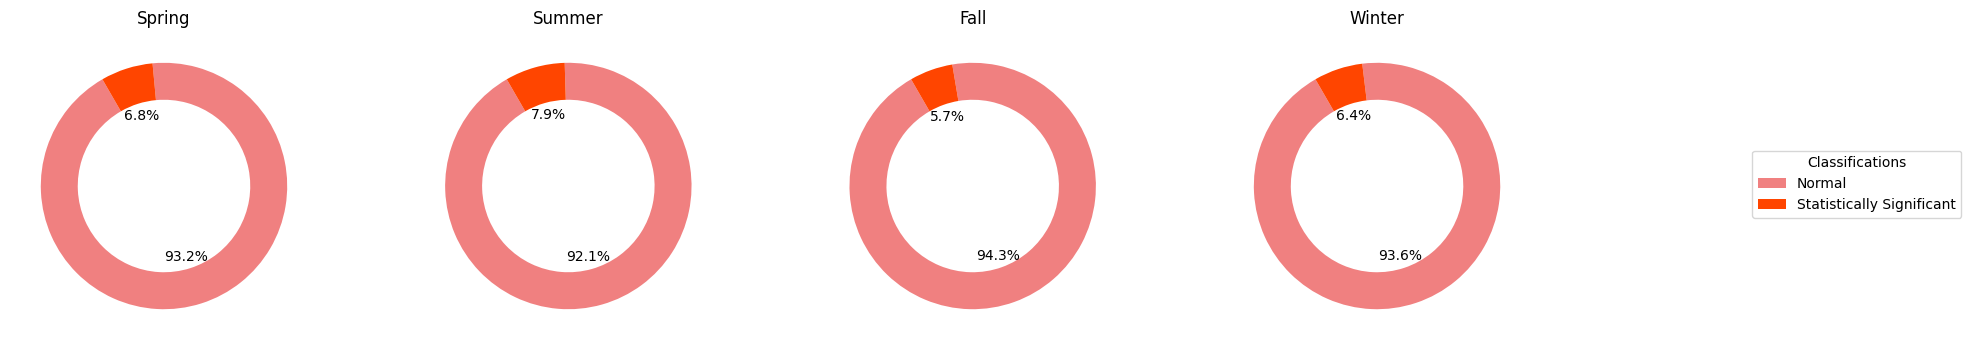

In [93]:
labelsSeasons = ['Spring', 'Summer', 'Fall', 'Winter']
classifications = [ "Normal", "Statistically Significant"]
colors = ["lightcoral", "orangered", "red"]


fig, axs = plt.subplots(1, 4, figsize=(20, 4))


for i, ax in enumerate(axs):
    wedges, texts, autotexts = ax.pie(dataFinalStatisticallySignificant[i], colors = colors, autopct='%1.1f%%', startangle=120, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})
    ax.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(labelsSeasons[i])

# Draw a legend
fig.legend(wedges, classifications,
           title="Classifications",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


1. Statistically Significant given Lift


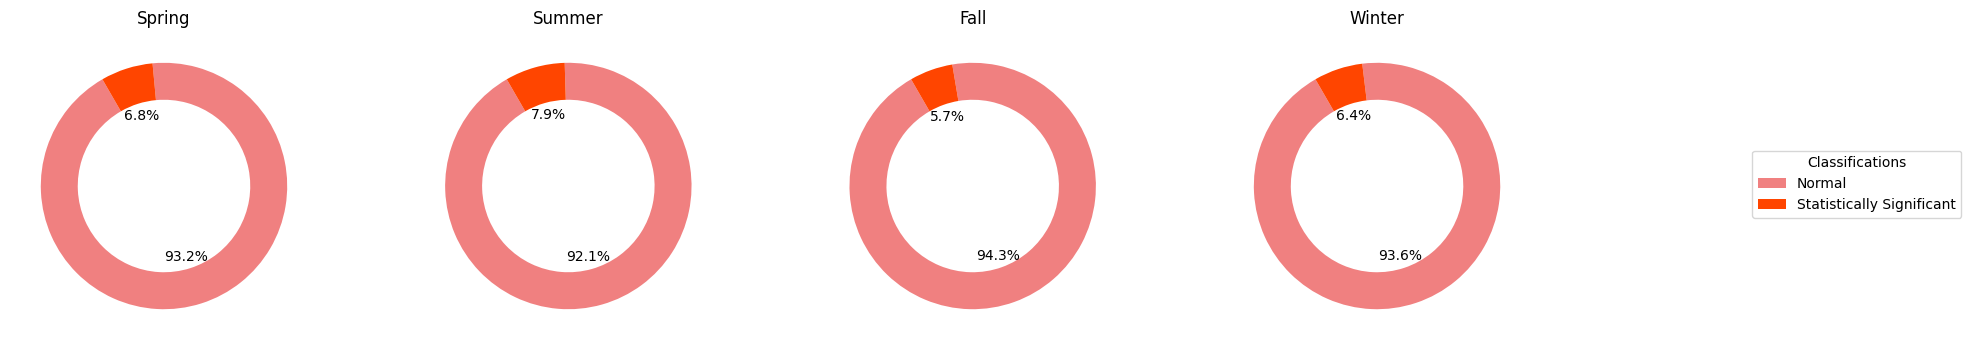

In [94]:
labelsSeasons = ['Spring', 'Summer', 'Fall', 'Winter']
classifications = [ "Normal", "Statistically Significant"]
colors = ["lightcoral", "orangered", "red"]


fig, axs = plt.subplots(1, 4, figsize=(20, 4))


for i, ax in enumerate(axs):
    wedges, texts, autotexts = ax.pie(dataFinalStatisticallySignificantLift[i], colors = colors, autopct='%1.1f%%', startangle=120, wedgeprops=dict(width=0.3), textprops={'fontsize': 10})
    ax.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(labelsSeasons[i])

# Draw a legend
fig.legend(wedges, classifications,
           title="Classifications",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [95]:
dataFinal = np.array(dataFinal)
dataFinal = dataFinal.reshape(4,5)
dataFinal = np.transpose(dataFinal)
dataFinal

array([[720, 688, 594, 454],
       [816, 844, 830, 846],
       [ 22,  19,  17,  11],
       [  2,   1,   1,   4],
       [ 36,  52,  32,  43]])

In [96]:
dataFinalLift = np.array(dataFinalLift )
dataFinalLift = dataFinalLift.reshape(4,5)
dataFinalLift = np.transpose(dataFinalLift)
dataFinalLift

array([[720, 688, 594, 454],
       [816, 844, 830, 846],
       [ 22,  18,  14,  10],
       [  2,   4,   4,   6],
       [ 36,  50,  32,  42]])

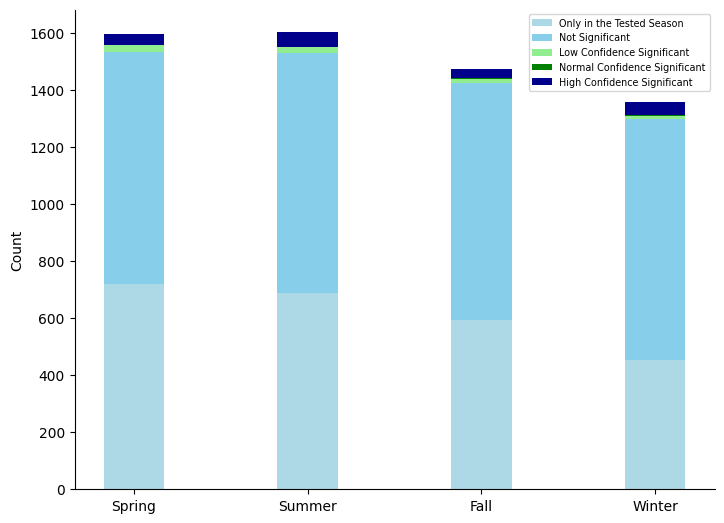

In [97]:


import numpy as np
import matplotlib.pyplot as plt
N = 4
InTestValues = dataFinal[0]
normalValues = dataFinal[1]
SSUnderValues = dataFinal[2]
SSValues = dataFinal[3]
SSOverValues = dataFinal[4]

ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(ind, InTestValues, width, color='lightblue')
ax.bar(ind, normalValues, width, bottom=InTestValues, color='skyblue')
ax.bar(ind, SSUnderValues, width, bottom=normalValues+InTestValues, color='lightgreen')
ax.bar(ind, SSValues, width, bottom=SSUnderValues+normalValues+InTestValues, color='green')
ax.bar(ind, SSOverValues, width, bottom=SSValues+SSUnderValues+normalValues+InTestValues, color='darkblue')


for edge_i in ['top', 'right']:
    ax.spines[edge_i].set_edgecolor("white")

ax.set_ylabel('Count')
#ax.set_title('Scores by Season')
ax.set_xticks(ind, ('Spring', 'Summer', 'Fall', 'Winter'))
ax.set_yticks(np.arange(0, 1800, 200))
ax.legend(labels=["Only in the Tested Season",'Not Significant',"Low Confidence Significant","Normal Confidence Significant","High Confidence Significant"],loc='upper right', fontsize='x-small')
plt.show()

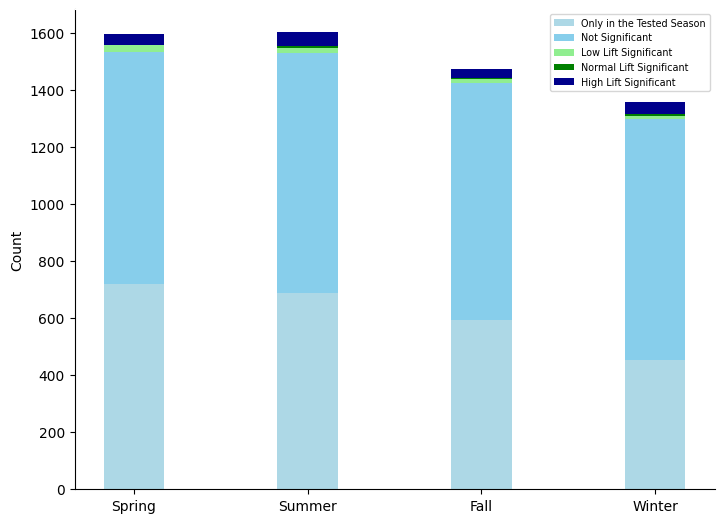

In [98]:
InTestValues = dataFinalLift[0]
normalValues = dataFinalLift[1]
SSUnderValues = dataFinalLift[2]
SSValues = dataFinalLift[3]
SSOverValues = dataFinalLift[4]

ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(ind, InTestValues, width, color='lightblue')
ax.bar(ind, normalValues, width, bottom=InTestValues, color='skyblue')
ax.bar(ind, SSUnderValues, width, bottom=normalValues+InTestValues, color='lightgreen')
ax.bar(ind, SSValues, width, bottom=SSUnderValues+normalValues+InTestValues, color='green')
ax.bar(ind, SSOverValues, width, bottom=SSValues+SSUnderValues+normalValues+InTestValues, color='darkblue')


for edge_i in ['top', 'right']:
    ax.spines[edge_i].set_edgecolor("white")

ax.set_ylabel('Count')
#ax.set_title('Scores by Season')
ax.set_xticks(ind, ('Spring', 'Summer', 'Fall', 'Winter'))
ax.set_yticks(np.arange(0, 1800, 200))
ax.legend(labels=["Only in the Tested Season",'Not Significant',"Low Lift Significant","Normal Lift Significant","High Lift Significant"],loc='upper right', fontsize='x-small')
plt.show()

In [99]:
dataBarChart = np.copy(dataFinal)
print(dataBarChart)
dataBarChart  = np.delete(dataBarChart, 0, 0)
SSvalues = np.delete(dataBarChart, 0, 0)
SSvalues = np.transpose(SSvalues)
SSrow = np.sum(np.delete(dataBarChart, 0, 0),axis=0)
print(SSrow)
print(SSvalues)
normalValuesInOverlap = dataBarChart[0]

[[720 688 594 454]
 [816 844 830 846]
 [ 22  19  17  11]
 [  2   1   1   4]
 [ 36  52  32  43]]
[60 72 50 58]
[[22  2 36]
 [19  1 52]
 [17  1 32]
 [11  4 43]]


In [100]:
dataBarChartLift = np.copy(dataFinalLift)
print(dataBarChartLift)
dataBarChartLift  = np.delete(dataBarChartLift, 0, 0)
SSvaluesLift = np.delete(dataBarChartLift, 0, 0)
SSvaluesLift = np.transpose(SSvaluesLift)
SSrowLift = np.sum(np.delete(dataBarChartLift, 0, 0),axis=0)
print(SSrowLift)
print(SSvaluesLift)
normalValuesInOverlapLift = dataBarChartLift[0]

[[720 688 594 454]
 [816 844 830 846]
 [ 22  18  14  10]
 [  2   4   4   6]
 [ 36  50  32  42]]
[60 72 50 58]
[[22  2 36]
 [18  4 50]
 [14  4 32]
 [10  6 42]]


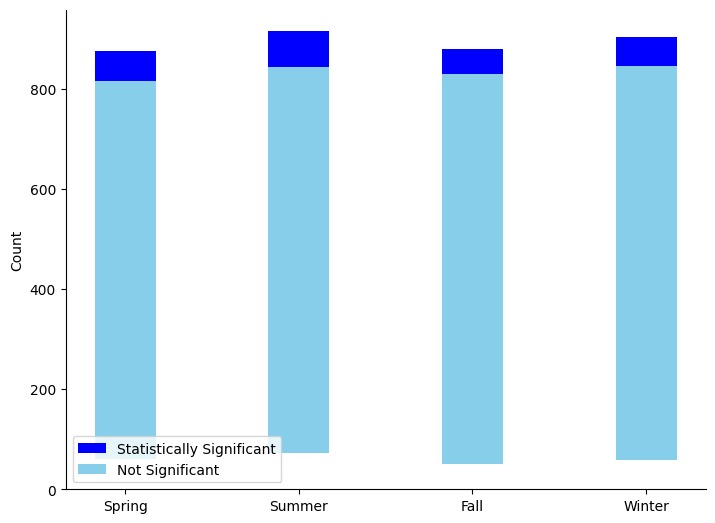

In [101]:
import numpy as np
import matplotlib.pyplot as plt
N = 4


ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Then plot the 'Not Significant' values on top
bars1 = ax.bar(ind, normalValuesInOverlap, width, bottom=SSrow, color='skyblue')
# Then plot the 'Statistically Significant' values on top
bars2 = ax.bar(ind, SSrow, width, bottom=normalValuesInOverlap, color='blue')

ax.set_ylabel('Count')
#ax.set_title('Normal anf statistically Significant values by season')

for edge_i in ['top', 'right']:
    ax.spines[edge_i].set_edgecolor("white")
    
ax.set_xticks(ind, ('Spring', 'Summer', 'Fall', 'Winter'))
ax.set_yticks(np.arange(0, 900, 200))
ax.legend((bars2[0], bars1[0]), ('Statistically Significant', 'Not Significant'))
plt.show()

In [102]:
AllRules = rulesTestFold[3][['antecedents','consequents']] 
AllRules

,antecedents,consequents
0,(bottled beer),(UHT-milk)
1,(UHT-milk),(bottled beer)
2,(UHT-milk),(bottled water)
3,(bottled water),(UHT-milk)
4,(newspapers),(UHT-milk)
...,...,...
1353,"(soda, whole milk)",(yogurt)
1354,"(yogurt, whole milk)",(soda)
1355,(soda),"(yogurt, whole milk)"
1356,(yogurt),"(soda, whole milk)"


## Limitations

Our approach has limitations due to the smaller test fold dataset:

- **More association rules**: Smaller datasets produce more rules as the support threshold is more easily met.
- **Reduced reliability**: Rules from smaller datasets may be less reliable and generalizable.

Factors contributing to this issue:
1. Lower support threshold
2. Increased sensitivity to noise
3. Reduced robustness

To mitigate:
- Carefully evaluate generated rules
- Consider statistical significance and relevance
- Use techniques like cross-validation or bootstrapping

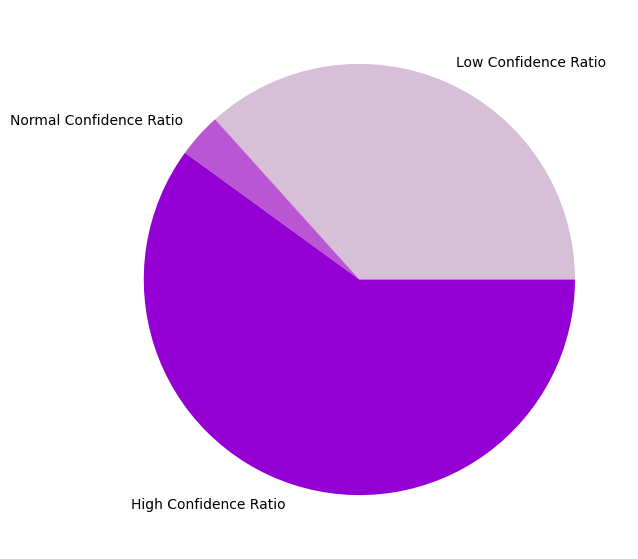

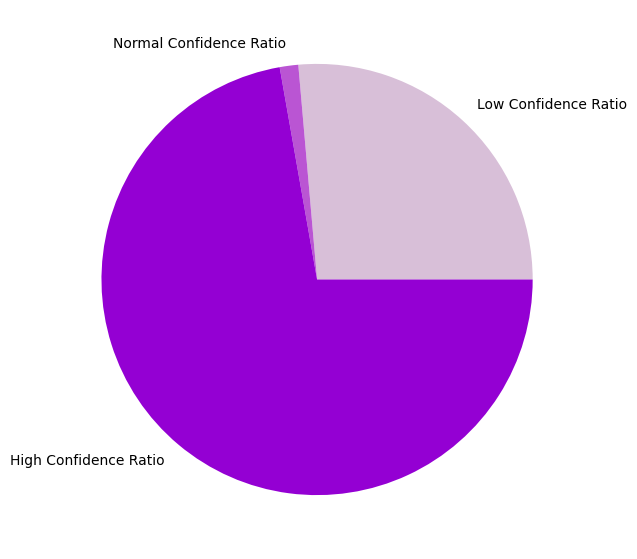

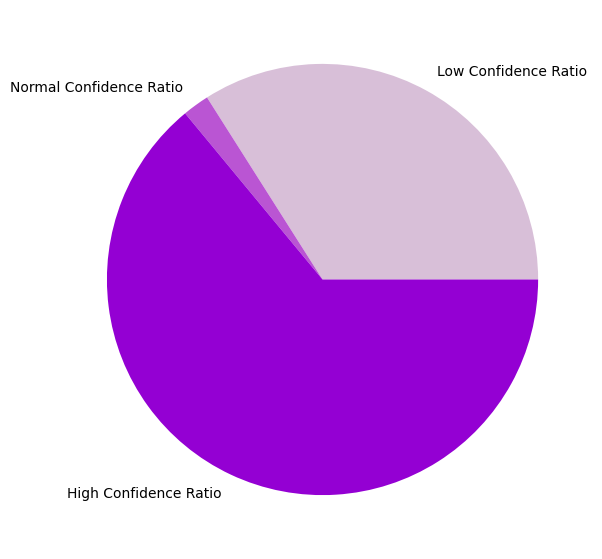

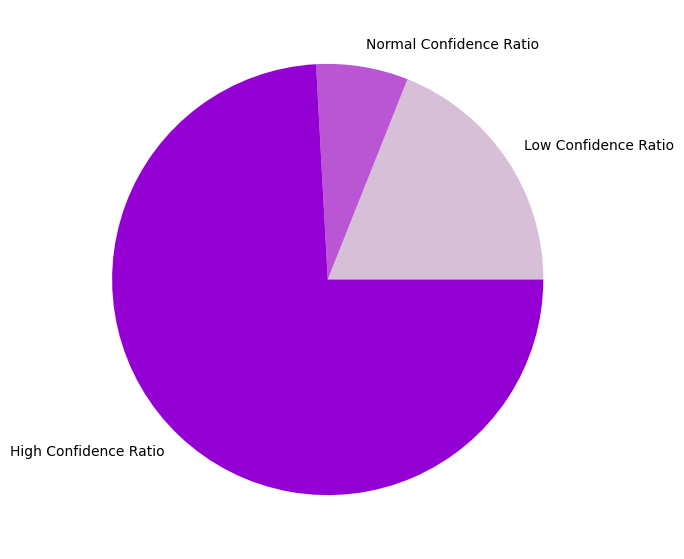

In [103]:
# Creating dataset
SSlabels = ['Low Confidence Ratio','Normal Confidence Ratio','High Confidence Ratio']
color = ["thistle", "mediumorchid", "darkviolet"]

for season in range(seasons):
    data = SSvalues[season]

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(data, labels = SSlabels, colors = color)

    # show plot
    plt.show()

In [104]:
range(seasons)

range(0, 4)

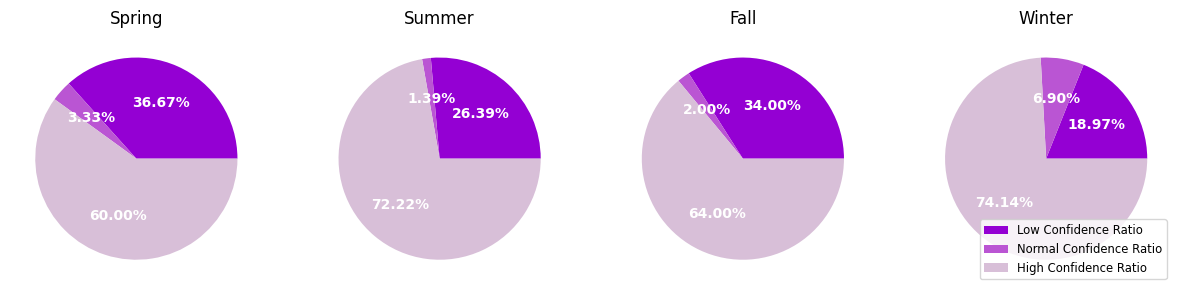

<Figure size 640x480 with 0 Axes>

In [105]:
plt.figure(figsize=(15,5))
SSlabels = ['Low Confidence Ratio','Normal Confidence Ratio','High Confidence Ratio']
color = ["darkviolet", "mediumorchid", "thistle"]

plt.subplot(1,4,1)
plt.pie(SSvalues[0], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'} )
plt.title("Spring")
plt.subplot(1,4,2)
plt.pie(SSvalues[1], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Summer")
plt.subplot(1,4,3)
plt.pie(SSvalues[2], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Fall")
plt.subplot(1,4,4)
plt.pie(SSvalues[3] , colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Winter")

plt.legend(labels = SSlabels, fontsize="small",loc='lower right' )


plt.show()

plt.savefig("fig.jpg")

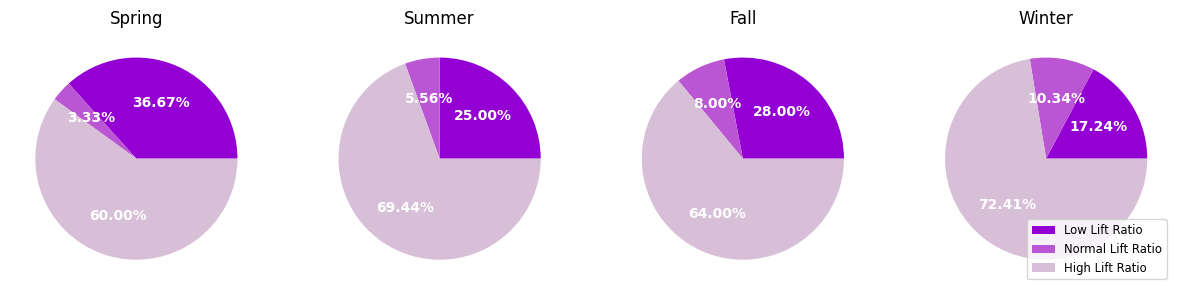

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure(figsize=(15,5))
SSlabels = ['Low Lift Ratio','Normal Lift Ratio','High Lift Ratio']
color = ["darkviolet", "mediumorchid", "thistle"]

plt.subplot(1,4,1)
plt.pie(SSvaluesLift[0], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'} )
plt.title("Spring")
plt.subplot(1,4,2)
plt.pie(SSvaluesLift[1], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Summer")
plt.subplot(1,4,3)
plt.pie(SSvaluesLift[2], colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Fall")
plt.subplot(1,4,4)
plt.pie(SSvaluesLift[3] , colors = color, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Winter")

plt.legend(labels = SSlabels, fontsize="small",loc='lower right' )


plt.show()

plt.savefig("fig.jpg")

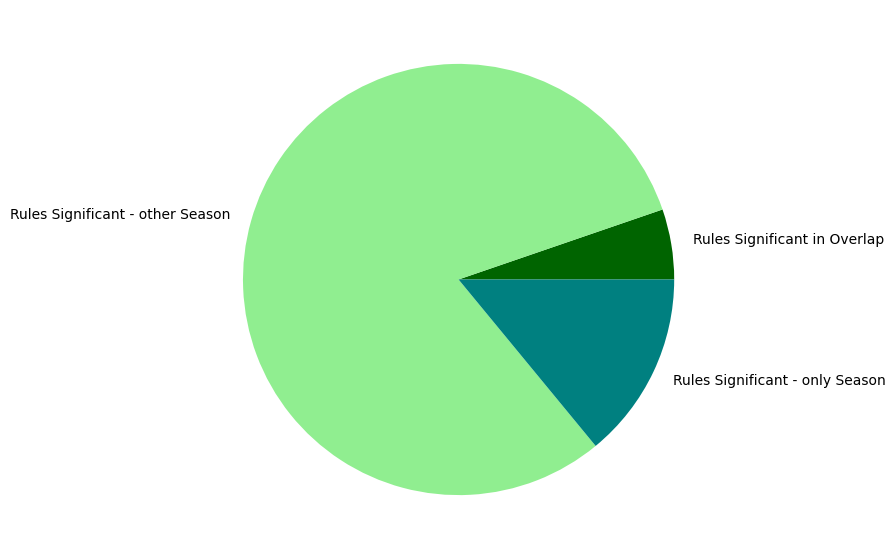

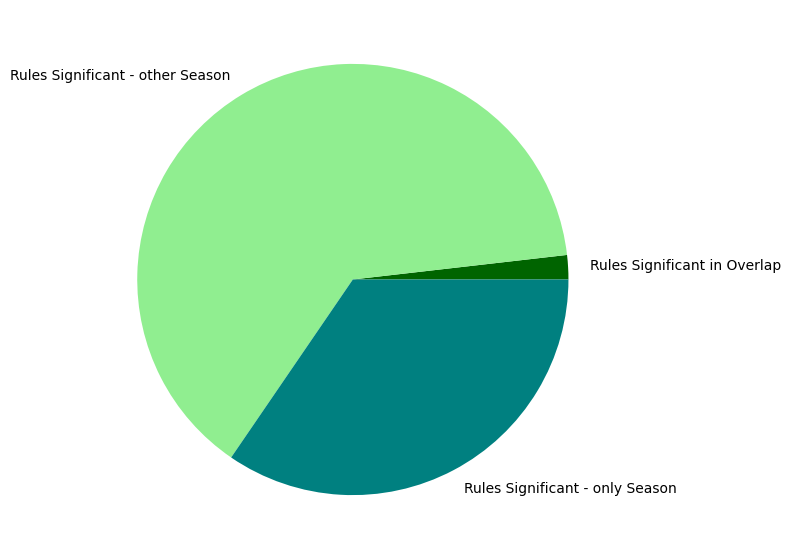

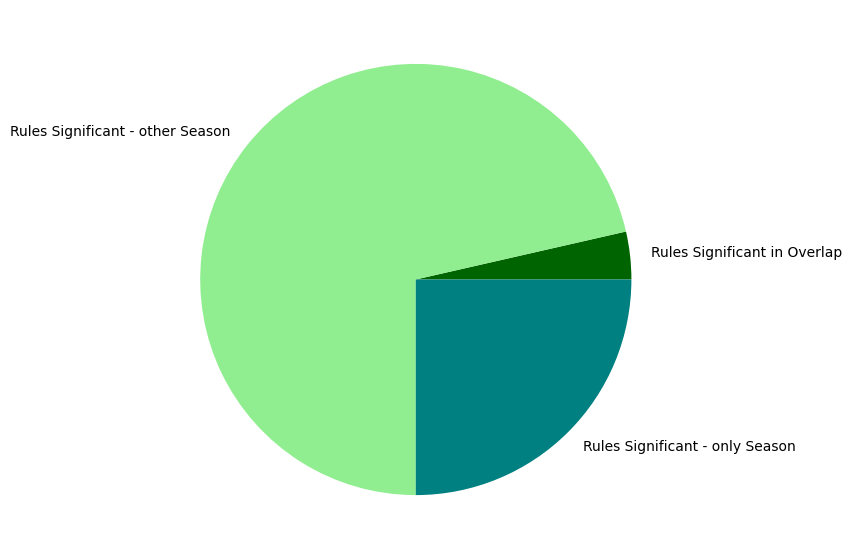

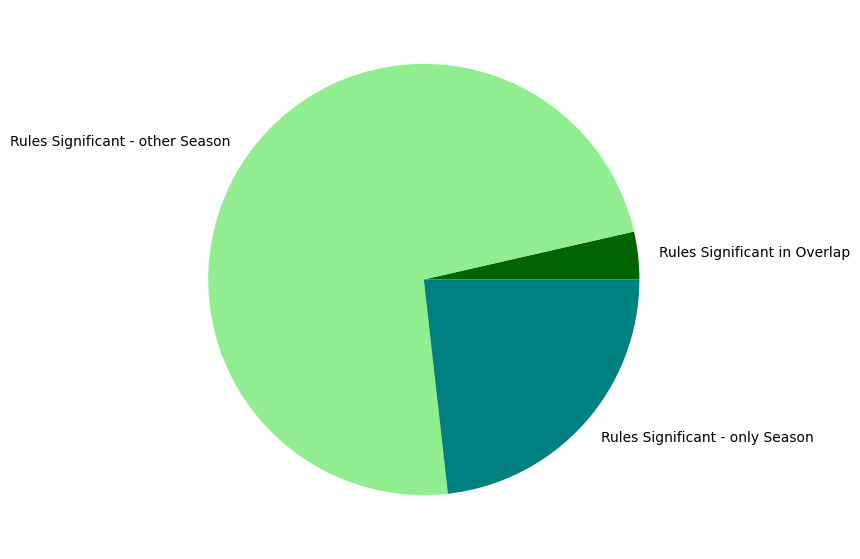

In [107]:
# Creating dataset
Ruleslabels = ['Rules Significant in Overlap','Rules Significant - other Season','Rules Significant - only Season']
colorBehaviour = ["darkgreen", "lightgreen", "teal"]

for season in range(seasons):
    data = RulesBehaviour[season]

    # Creating plot
    fig = plt.figure(figsize =(10, 7))
    plt.pie(data, labels = Ruleslabels, colors = colorBehaviour)

    # show plot
    plt.show()

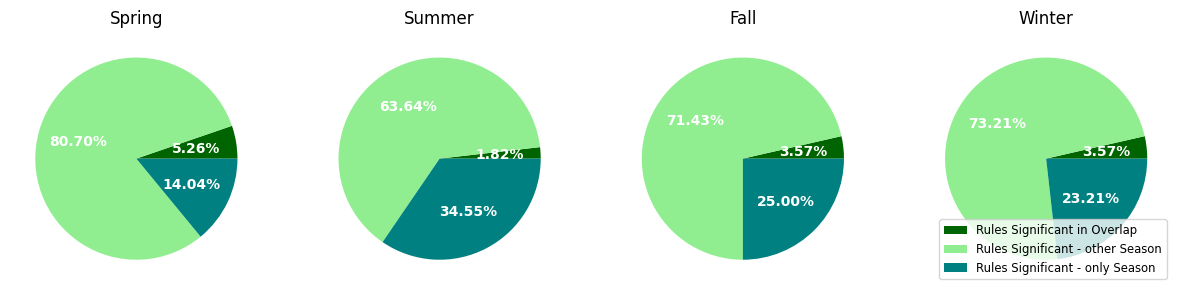

<Figure size 640x480 with 0 Axes>

In [108]:
plt.figure(figsize=(15,5))


plt.subplot(1,4,1)
plt.pie(RulesBehaviour[0], colors = colorBehaviour, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'} )
plt.title("Spring")
plt.subplot(1,4,2)
plt.pie(RulesBehaviour[1], colors = colorBehaviour, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Summer")
plt.subplot(1,4,3)
plt.pie(RulesBehaviour[2], colors = colorBehaviour, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Fall")
plt.subplot(1,4,4)
plt.pie(RulesBehaviour[3] , colors = colorBehaviour, autopct='%1.2f%%', textprops={'color':"w", 'weight':'bold'})
plt.title("Winter")

plt.legend(labels = Ruleslabels, fontsize="small",loc='lower right' )


plt.show()
plt.savefig("fig.jpg")

# Annex Code 
We will consign here functions, that were used during our exploration of the data, but are not used above.

In [109]:
def ExpectedContingencyTableRule(n,support, lift, confidence):
     # we build a list 
    # containg the probabilitie of the Expected Contigency Table

    AandB = n*support/lift
    AandNotB = n*support/confidence*(1-confidence/lift)
    NotAandB = n*(1-support/confidence)*(confidence/lift)
    NotAandNotB = n*(1-support/confidence)*(1-confidence/lift)
    # those probabilities are computed as Specfied in the Boston College Paper
    return [AandB,AandNotB,NotAandB,NotAandNotB]

def ChiSquareComputationReloaded(n,support, lift, confidence):
    ChiSquareValue = n*np.power((lift-1),2)*(support*confidence)/((confidence-support)*(lift-confidence))
    # those are a different type of chi-Square to use on a set of rules
    # we may need it but it's not the most useful
    return ChiSquareValue

In [110]:
# chek the results for a antecedent
df = dfSeason_overlap[1].copy(deep=True)
df["antecedents"] = df["antecedents"].apply(lambda x: ''.join(list(x))).astype("unicode")
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['antecedents'] == "whole milk")]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
49,whole milk,(berries),1.710267,1.780644,1.859006,3.597085
60,whole milk,(beverages),1.950169,2.030418,2.124348,4.792150
107,whole milk,(bottled beer),0.715062,0.744486,0.633849,4.625217
423,whole milk,(dessert),1.758107,1.830452,1.897601,4.092625
443,whole milk,(domestic eggs),1.784269,1.857691,1.478905,3.518451
625,whole milk,(napkins),1.973385,2.054589,1.924108,4.404632


In [111]:
# chek the results for a consequent
df = dfSeason_overlap[3].copy(deep=True) # deep copy to not change our tables
df["consequents"] = df["consequents"].apply(lambda x: ''.join(list(x))).astype("unicode")
df.loc[(df['Chi-Square-Unbiased'] >= ChiSquareCriticalValue90) & (df['consequents'] == "whole milk")]

,antecedents,consequents,Confidence Ratio,Support Ratio,Lift Ratio,Chi-Square-Unbiased
290,(chicken),whole milk,1.823864,1.671177,2.068858,7.536841
408,(dessert),whole milk,0.402427,0.494165,0.456484,3.086909
693,(other vegetables),whole milk,0.666618,0.673368,0.756163,3.107412
840,(soda),whole milk,1.303691,1.305892,1.478812,7.093863
860,(tropical fruit),whole milk,1.255123,1.218566,1.423720,3.888226
